In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import random
import os
import glob
import shutil
import itertools
import warnings
from sklearn.metrics import confusion_matrix
from keras.models import Model

# Making files in my directory

In [8]:
os.chdir('Sign-Language-Digits-Dataset')
if os.path.isdir('train/0') is False:
    os.makedirs('train')
    os.makedirs('valid')
    os.makedirs('test')
    for i in range (0,10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        valid_samples=random.sample(os.listdir(f'train/{i}'),30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
        
        test_samples=random.sample(os.listdir(f'train/{i}'),5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')

os.chdir('C:\\Users\\Faramarz\\Desktop\\Keras Practice')

In [9]:
train_path='C:\\Users\\Faramarz\\Desktop\\Keras Practice\\Sign-Language-Digits-Dataset\\train'
valid_path='C:\\Users\\Faramarz\\Desktop\\Keras Practice\\Sign-Language-Digits-Dataset\\valid'
test_path='C:\\Users\\Faramarz\\Desktop\\Keras Practice\\Sign-Language-Digits-Dataset\\test'

In [10]:
train_batch=keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path,
                                                                                                                                                   target_size=(224,224),batch_size=10)
valid_batch=keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path,
                                                                                                                                                   target_size=(224,224),batch_size=10)
test_batch=keras.preprocessing.image.ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path,
                                                                                                                                                  target_size=(224,224),batch_size=10
                                                                                                                                                 ,shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [12]:
assert train_batch.n==1712
assert valid_batch.n==300
assert test_batch.n==50
assert train_batch.num_classes==valid_batch.num_classes==test_batch.num_classes==10

In [13]:
img,labels=next(train_batch)

In [14]:
def plot_images(image):
    fig,axis=plt.subplots(1,10, figsize=(20,20))
    axis=axis.flatten()
    for img,ax in zip(image,axis):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [15]:
#plot_images(img)

In [16]:
#print(labels)

In [17]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers import Activation, Dense, Flatten , Conv2D, MaxPool2D

# Pridict

In [40]:
def plot_confusion(cm,classes,normilize=False,title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normilize:
        cm=cm.astype('float')/cm.sum(axis=1)[: , np.newaxis]
        print('Normilized Confusion Matrix')
    else:
        print('Without Normalization')
        
    print(cm)
    thresh=cm.max()/2.
    for j,i in itertools.product(range (cm.shape[0]), range(cm.shape[1])):
        plt.text(i,j,cm[i,j],
                color='white' if cm[i,j]>thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted label')

In [19]:
from sklearn.metrics import plot_confusion_matrix
from keras.preprocessing import image

In [20]:
mobil=keras.applications.mobilenet.MobileNet()

In [30]:
x=mobil.layers[-6].output
output=Dense(units=10, activation='softmax')(x)


In [31]:
model=Model(inputs=mobil.input, outputs=output)

In [32]:
for layer in model.layers[:-23]:
    layer.trainable=False
    

In [34]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
model.fit(x=train_batch, validation_data=valid_batch, epochs=1, verbose=2, steps_per_epoch=171, validation_steps=30 )

171/171 - 236s - loss: 0.6319 - accuracy: 0.8179 - val_loss: 0.3642 - val_accuracy: 0.8833


In [36]:
test_labels=test_batch.classes


In [37]:
prediction= model.predict(x=test_batch, verbose=0)

In [38]:
cm=confusion_matrix(y_true=test_labels, y_pred=prediction.argmax(axis=1))

Without Normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 1 0 4 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0]
 [0 0 1 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 1 0 0 0 0 0 0 0 4]]


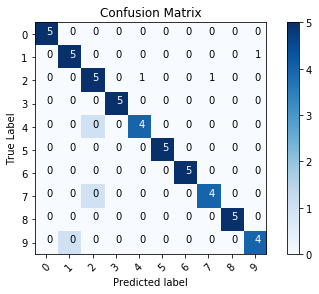

In [41]:
cm_labels=['0','1','2','3','4','5','6','7','8','9']
plot_confusion(cm=cm,classes=cm_labels )

In [27]:
def prepare_image(file):
    img_path="prepare_image/"
    img=image.load_img(img_path+file, target_size=(224,224))
    img_array=image.img_to_array(img)
    img_array_expanded=np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded)

In [42]:
from IPython.display import Image
my_img=Image(filename="prepare_image/"+'1.jpg',width=300,height=200)


In [43]:
preprocessed_img=prepare_image("1.jpg")

In [44]:
prediction= mobil.predict(preprocessed_img)

In [46]:
from keras.applications import imagenet_utils

In [48]:
result=imagenet_utils.decode_predictions(prediction)

In [49]:
result

[[('n02099601', 'golden_retriever', 0.5680741),
  ('n02101388', 'Brittany_spaniel', 0.27741382),
  ('n02099267', 'flat-coated_retriever', 0.08685526),
  ('n04409515', 'tennis_ball', 0.03451738),
  ('n02100583', 'vizsla', 0.010079648)]]